# Ejercicio 2

In [2]:
# Importacion de librerias
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats

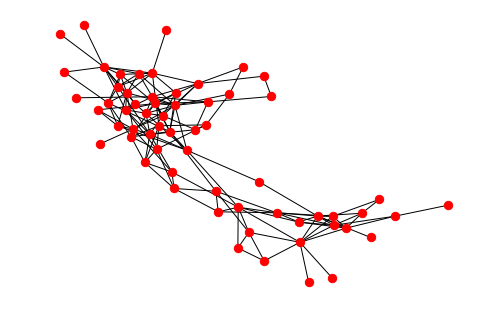

In [3]:
G=nx.read_gml('dolphins.gml')
nx.draw(G, with_labels=False, font_weight='bold',node_size=70)
plt.show()
#list(G)

In [30]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

data_gender=ldata('dolphinsGender.txt')
data_gender
colores=[]

#le agregamos el atributo "genero" al grafo G
for elemento in data_gender:
    G.node[elemento[0]]['genero']=elemento[1]
    
#creamos un vector de colores que vincula los generos (mismo orden)     
for gen in nx.get_node_attributes(G, "genero").values():
    if gen=='f':
        colores.append('red')
    elif gen=='m':
        colores.append('blue')
    else:
        colores.append('grey')
        


In [45]:
#list(G.edges)

#print(list(G.edges)[0])
#print(list(G.edges)[0][0])
#G.node[list(G.edges)[0][0]]['genero']
#for i in range(0,len(list(G.edges))):
#    if G.node[list(G.edges)[i][0]]['genero']==G.node[list(G.edges)[i][1]]['genero']:
#print(G[0][0])
G.edges[1, 2]
#['genero']=elemento[1]

KeyError: 0

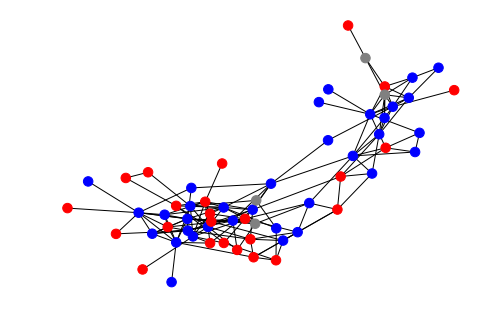

In [116]:
nx.draw(G, with_labels=False,node_color=colores, font_weight='bold',node_grouping='genero',node_size=90)
plt.show()

In [101]:
## calcula la fraccion de enlaces entre nodos de distinto genero
def fraccion_mh(G): 
    A = nx.adjacency_matrix(G)  # Matriz de adycencia
    v=0
    enlaces = 0.0  # cantidad de enlaces (excluyendo los NA)
    union_mh = 0.0 # cantidad de enlaces macho-hembra
    for node_v in G:      # Loop de nodo v
        genero_v = nx.get_node_attributes(G, "genero").values()[v]
        w=0
        for node_w in G:  # Loop de nodo w
            genero_w = nx.get_node_attributes(G, "genero").values()[w]
            if (A[v,w]==1):
                if( genero_v!='NA' and  genero_w!='NA'):
                    enlaces += 1.0
                    if(not (genero_v==genero_w)):
                        union_mh+=1.0
            w+=1
        v+=1
    Q = union_mh/enlaces
    return Q

In [102]:
%%time
fraccion_mh_data = fraccion_mh(G)
nodes = nx.get_node_attributes(G, "genero").values()
array_fraccion = []
iter_max = 1500
iteracion=0
G_copy = G.copy()
while iteracion<iter_max:
    random.shuffle(nodes)
    i=0
    for n in G_copy: # cambia el genero de los delfines
        G_copy.node[n]['genero']= nodes[i]
        i+=1
    array_fraccion +=[fraccion_mh(G_copy)]
    iteracion+=1
print("mean random:",np.mean(array_fraccion))
print("DATA:",fraccion_mh_data)


('mean random:', 0.49214393263685935)
('DATA:', 0.45390070921985815)
CPU times: user 6min 18s, sys: 112 ms, total: 6min 18s
Wall time: 6min 18s


In [105]:
# Dado un array y un valor, encuentra el indice del valor del array mas cercano al valor pasado
def find_nearest(array, value):
    i=0
    while i<len(array)-1:
        if array[i]<=value and array[i+1]>=value:
            distancia1 = abs(array[i]-value)
            distancia2 = abs(array[i+1]-value)
            if distancia1>=distancia2:
                indice = i+1
            else: 
                indice =i
        i+=1
    return indice

('STD:', 0.041842647384441434)
[ 2  3  0  1  1  4  2  8 17 11  9 27 27 39 34 44 57 70 76 85 91 74 90 84
 92 89 88 79 60 54 54 40 26 20 13 10  9  4  1  5]


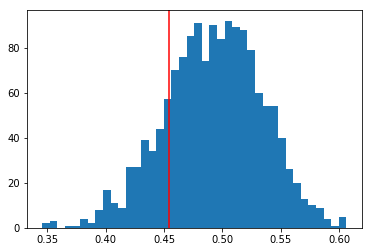

In [113]:
cantidad_bins = 40
plt.axvline(x=fraccion_mh_data,color ='r')
print("STD:",np.std(array_fraccion))

hist, bin_edges = np.histogram(array_fraccion,bins=cantidad_bins)
plt.hist(array_fraccion,bins=cantidad_bins)
print(hist)
#print(bin_edges)
#print(array_fraccion)

In [110]:
def calcula_pvavlue(hist):
    bin_size = bin_edges[1]-bin_edges[0]
    i=0
    suma_parcial=0.0
    while i<=find_nearest(bins,fraccion_mh_data):
        suma_parcial += hist[i]*bin_size
        i+=1

    i=0
    suma_total=0.0
    while i<len(hist):
        suma_total += hist[i]*bin_size
        i+=1  
    valor_p = suma_parcial/suma_total
    return valor_p
valor_p = calcula_pvavlue(hist)
print("Valor p:",round(valor_p,4))

('Valor p:', 0.0033)
